In [17]:
# impotação das ferramentas 
import os, sys 
import pandas as pd 
import numpy as np 
import warnings
from io import BytesIO
from reportlab.lib.pagesizes import letter, landscape
from reportlab.pdfgen import canvas
from io import BytesIO
import plotly.express as px
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import plotly.graph_objects as go
from IPython.display import Image, display

In [18]:
# carremganeto de dados 
from src.get_data import get_processing_data 
df = pd.read_excel(get_processing_data())

## Informação dos dados:

In [19]:
# Buscando informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Método                                                                                                                50 non-null     object
 1   Qual a sua turma?                                                                                                     50 non-null     object
 2   Nome Completo                                                                                                         50 non-null     object
 3   Em que fase está a sua empresa após o programa?                                                                       50 non-null     object
 4   Faturamento ante

In [20]:
print(f"Esta é quantidade de linhas: {df.shape[0]}")
print(f"Esta é quantidade de colunas: {df.shape[1]}")

Esta é quantidade de linhas: 50
Esta é quantidade de colunas: 21


**Anotação:**
Estes dados contém 50 linhas e 21 colunas, há uma necessidade de transformar certas variáveis categoricas para variáveis númericas

*O InovAtiva tem em missão em apoiar o desenvolvimento do ecossistema e empreendedorismo inovador no Brasil. Os programas evento do 
InovATIVA promovem diferentes oportunidades de aceleração de negócios inovadores, conexão com potenciais investidores e parceiros, e capitação 
de empreendedores. Grande alvos do programa é para empreendedores, mentores, investidores, avalladores.*


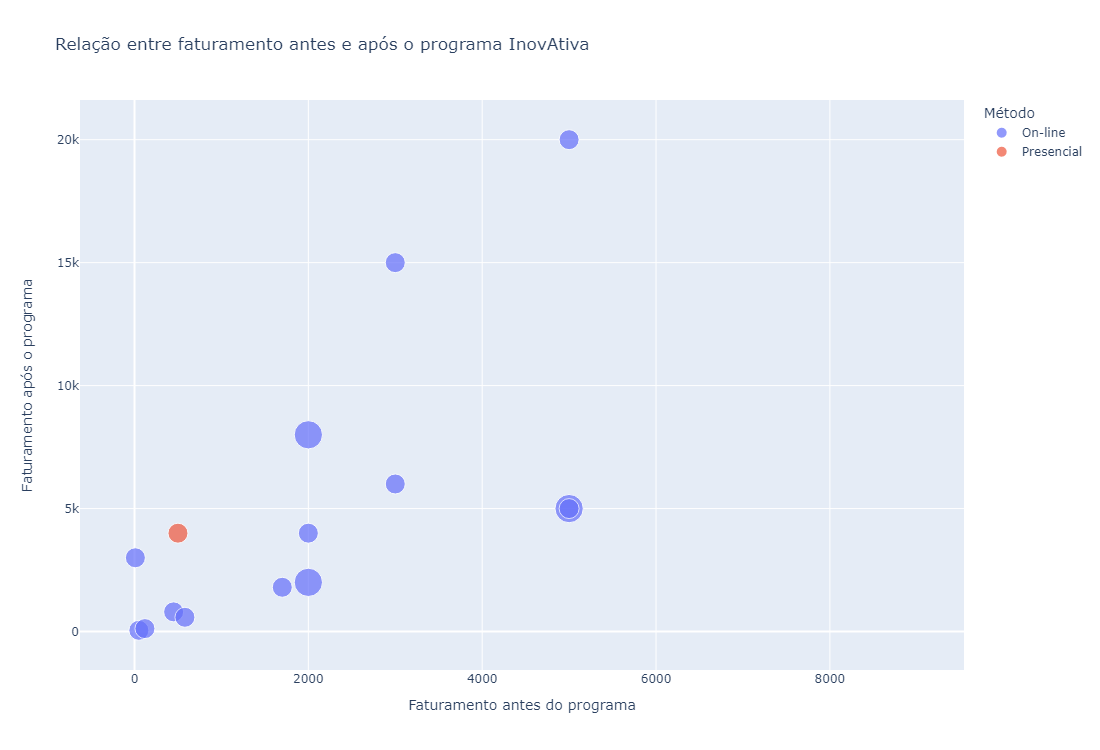

In [21]:
# Gráfico de Dispersão para mostrar a relação entre faturamento antes e após o programa em modo geral 
fig3 = px.scatter(df, x="Faturamento antes do programa", y="Faturamento após o programa",
                  color="Método", size="Você gerou quantos empregos durante/após a participação no Inovativa?",
                  hover_data=["Nome Completo"],
                  title="Relação entre faturamento antes e após o programa InovAtiva")
fig3.update_layout(
    height=750, # height para ajustar o tamanho do gráfico 
    width=1100 # width para ajustar o tamanho do gráfico
)

fig3.write_image("image\\grafico_relacao_faturamento.png")

display(Image("image\\grafico_relacao_faturamento.png"))


Neste gráfico de disperção podemos vê que o métedo do programa Inovativa é muito eficaz para o cresimento financeiro do negocios do seus cliente e com isso podemos observar que também o métedo On-line é mais eficaz ainda trazendo ganhos exponencial ao comparativo do presencial, podemos observa os métedos e práticas do On-line para dar continuidade para os proximos cliente ele sim que traz mais resultado. 

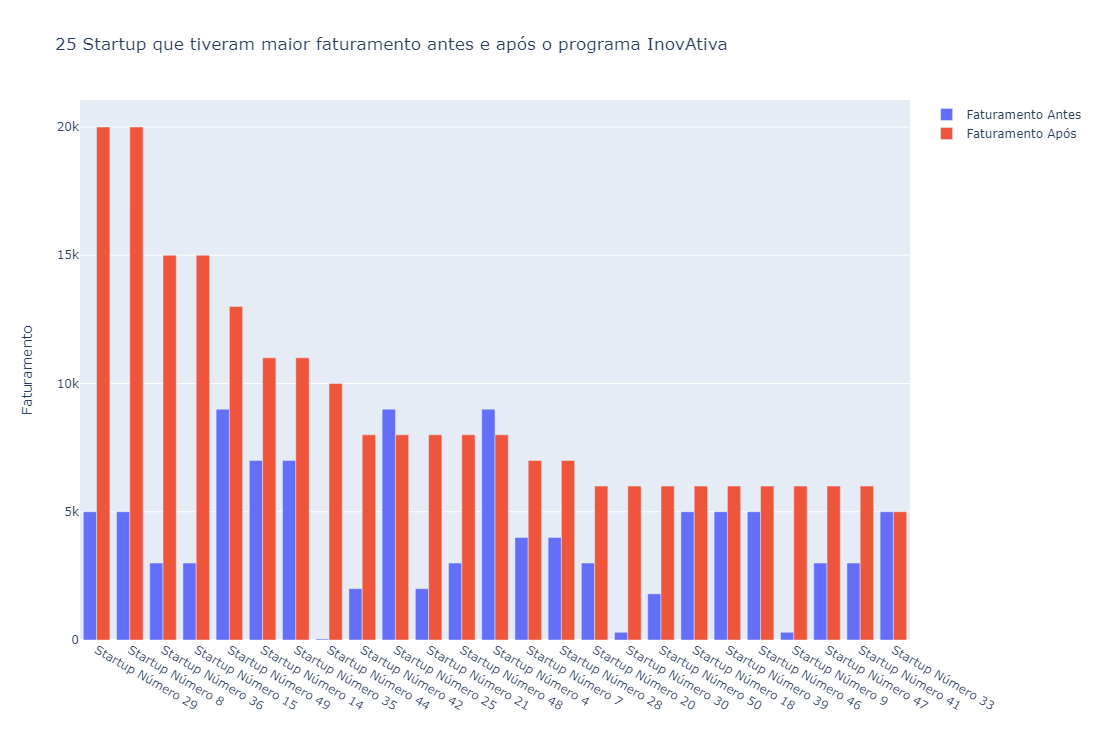

In [22]:
# Ordenar as startups pelo faturamento após o programa em ordem decrescente
df_sorted = df.sort_values(by="Faturamento após o programa", ascending=False)

# Selecionar apenas as 24 startups com maior faturamento após o programa
top_25_startups = df_sorted.head(25)

# Gráfico de Barras para comparar o faturamento antes e após o programa das 24 startups com maior faturamento
fig1 = go.Figure()

fig1.add_trace(go.Bar(x=top_25_startups["Nome Completo"], y=top_25_startups["Faturamento antes do programa"], name="Faturamento Antes"))
fig1.add_trace(go.Bar(x=top_25_startups["Nome Completo"], y=top_25_startups["Faturamento após o programa"], name="Faturamento Após"))

fig1.update_layout(title="25 Startup que tiveram maior faturamento antes e após o programa InovAtiva",
                   xaxis_title="",
                   yaxis_title="Faturamento",
                   barmode="group",
                   height=750, # Ajuste o valor de height para aumentar ou diminuir o tamanho do gráfico
                   width=1100)  # Ajuste o valor de widht para aumentar ou diminuir o tamanho do gráfico

# Salvar o gráfico como imagem
fig1.write_image("image\\grafico_faturamento_top_25.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_faturamento_top_25.png"))



Podemos observar neste gráfico que essas startups tiveram um escala de 0 á 20k de faturamento com o treinamento do inovativa, devemos levar em consieração os casos de cada projeto mas podemos observar que a faturamento estavel é mais de 5k ou seja o metedo da inovativa é muito eficaz para o seu negocio trazendo a possibilidade de ganhos exponencial.

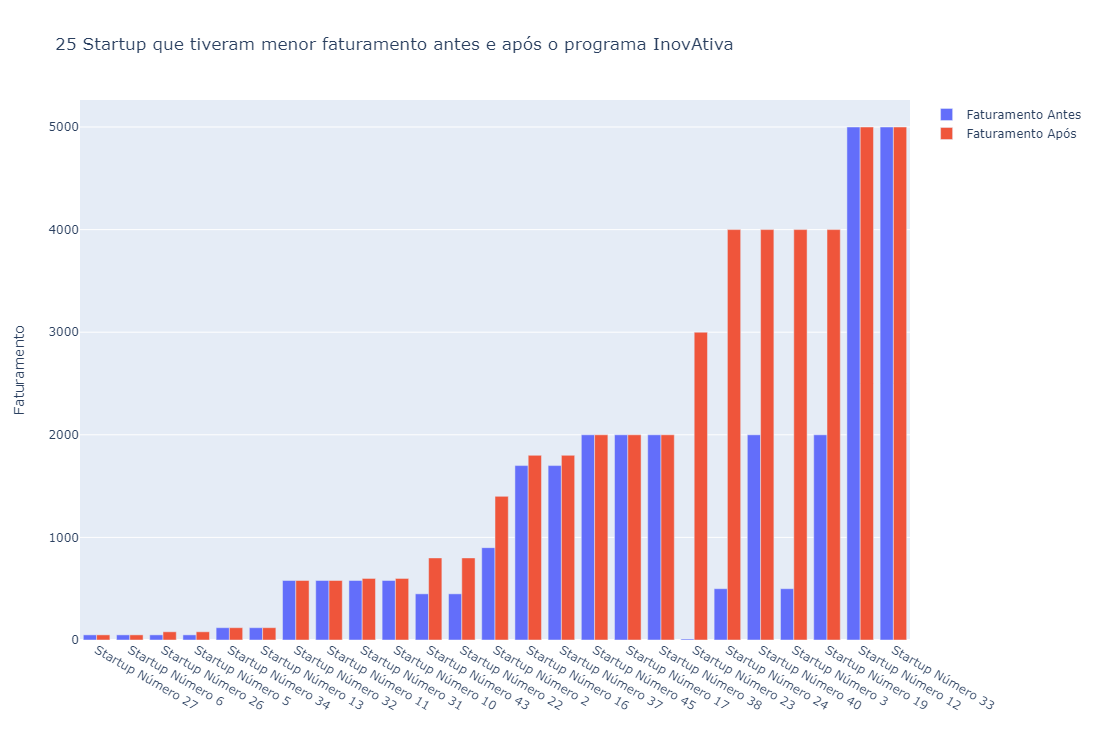

In [23]:
# Ordenar as startups pelo faturamento após o programa em ordem decrescente
df_sorted = df.sort_values(by="Faturamento após o programa", ascending=True)

# Selecionar apenas as 24 startups com menor  faturamento após o programa
top_25_startups = df_sorted.head(25)

# Gráfico de Barras para comparar o faturamento antes e após o programa das 24 startups com menor faturamento
fig1 = go.Figure()

fig1.add_trace(go.Bar(x=top_25_startups["Nome Completo"], y=top_25_startups["Faturamento antes do programa"], name="Faturamento Antes"))
fig1.add_trace(go.Bar(x=top_25_startups["Nome Completo"], y=top_25_startups["Faturamento após o programa"], name="Faturamento Após"))

fig1.update_layout(title="25 Startup que tiveram menor faturamento antes e após o programa InovAtiva",
                   xaxis_title="",
                   yaxis_title="Faturamento",
                   barmode="group",
                   height=750, # Ajuste o valor de height para aumentar ou diminuir o tamanho do gráfico
                   width=1100)  # Ajuste o valor de widht para aumentar ou diminuir o tamanho do gráfico

# Salvar o gráfico como imagem
fig1.write_image("image\\grafico_faturamento_lower_25.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_faturamento_lower_25.png"))


Neste gráfico podemos observar as startups que não passaram de 5k de faturamento após o treinamento da inovativa, levando em consideração também o projeto, podemos analisar e observar oque ocorreu de fato, podemos vê startup que não tiveram capital antes do treinamento e conseguiram alavancar absurdamente e também tiveram startups que saiu no estavel não ganhou e nem perdeu, oque podemos afirma que para o cresimento do seu negócio devemos levar em consideração vários topicos para adquirir o programa inovativa você tem possibilidades de ter ganhos abusrdos e ficar no zero a zero

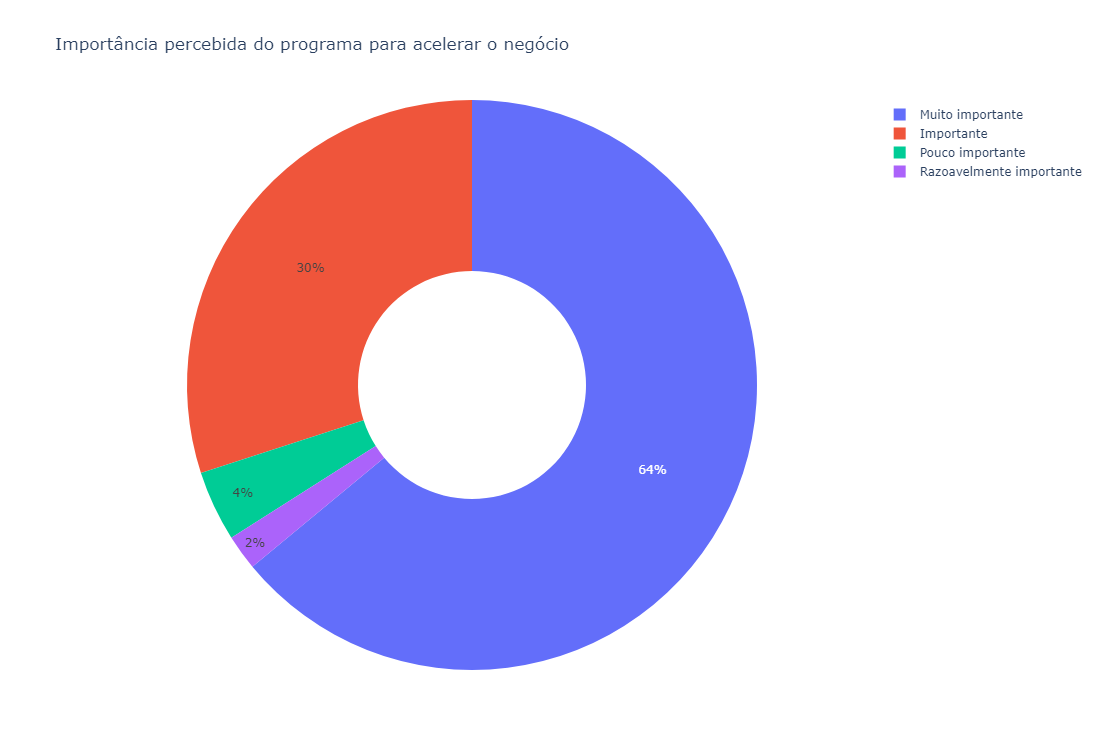

In [24]:
# Gráfico de Pizza para mostrar a importância percebida do programa para acelerar o negócio em cada startup
fig2 = go.Figure()

# Contar o número de startups para cada nível de importância percebida
importancia_counts = df["Para você acelerar o seu negócio, o quanto participar do Inovativa foi importante?"].value_counts()

fig2.add_trace(go.Pie(labels=importancia_counts.index, values=importancia_counts.values, hole=0.4))

fig2.update_layout(title="Importância percebida do programa para acelerar o negócio",
                #    annotations=[{"text": "Importância", "showarrow": False}],
                   showlegend=True,
                   height=750, # height para configurar o tamanho do gráfico 
                   width=1100) # width para configurar o tamanho do gráfico 

# Salvar o gráfico como imagem
fig2.write_image("image\\grafico_importancia.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_importancia.png"))


Análise de importancia sobre o programa inovAtiva sobre os négocios da statups avaliação em modo geral

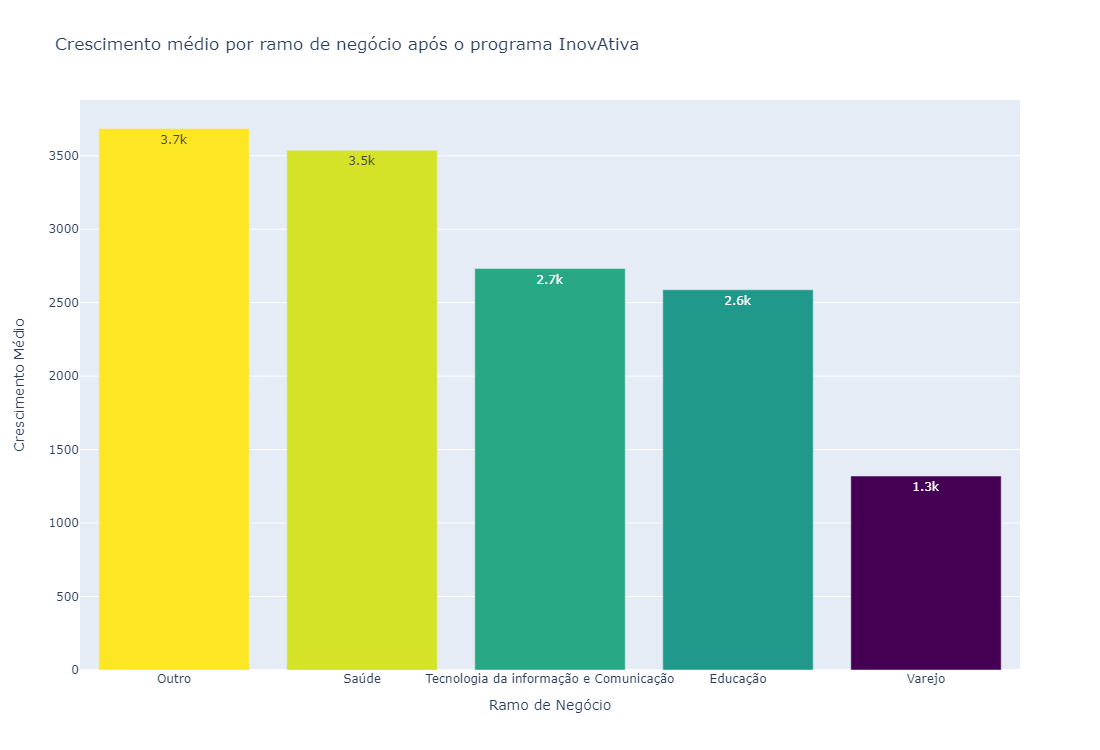

In [25]:
# Calcular a diferença entre o faturamento após o programa e o faturamento antes do programa
df["Crescimento"] = df["Faturamento após o programa"] - df["Faturamento antes do programa"]


# Agrupar os dados pelo ramo do negócio e calcular a média do crescimento para cada ramo
ramo_crescimento = df.groupby("Qual o ramo do seu negócio?")["Crescimento"].mean().reset_index()


# Ordenar os dados pela média de crescimento em ordem decrescente
ramo_crescimento = ramo_crescimento.sort_values(by="Crescimento", ascending=False)


# Gráfico de Barras para mostrar o crescimento médio por ramo de negócio
fig5 = go.Figure()


fig5.add_trace(go.Bar(x=ramo_crescimento["Qual o ramo do seu negócio?"],
                      y=ramo_crescimento["Crescimento"],
                      marker=dict(color=ramo_crescimento["Crescimento"], colorscale="Viridis"),
                      text=ramo_crescimento["Crescimento"],
                      textposition="inside",
                      texttemplate='%{text:.2s}',)) # simplicando o número na barra 

fig5.update_layout(title="Crescimento médio por ramo de negócio após o programa InovAtiva",
                   xaxis_title="Ramo de Negócio",
                   yaxis_title="Crescimento Médio",
                   coloraxis_showscale=False,
                   height=750, # height para configurar o tamanho do gráfico 
                   width=1100) # width para configurar o tamanho do gráfico 

# Salvar o gráfico como imagem
fig5.write_image("image\\grafico_crescimento_ramo_negocio.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_crescimento_ramo_negocio.png"))


Cresimento médio do tipo de negocios das startups podemos vê que temo uma variavel outro que não informa de fato o negoico da startup, isso pode ocorre além de um negocio especifico a inovAtiva também pode ser realizada para diversos areas especificas network, capitação de cliente ou até mesmo para area especifica

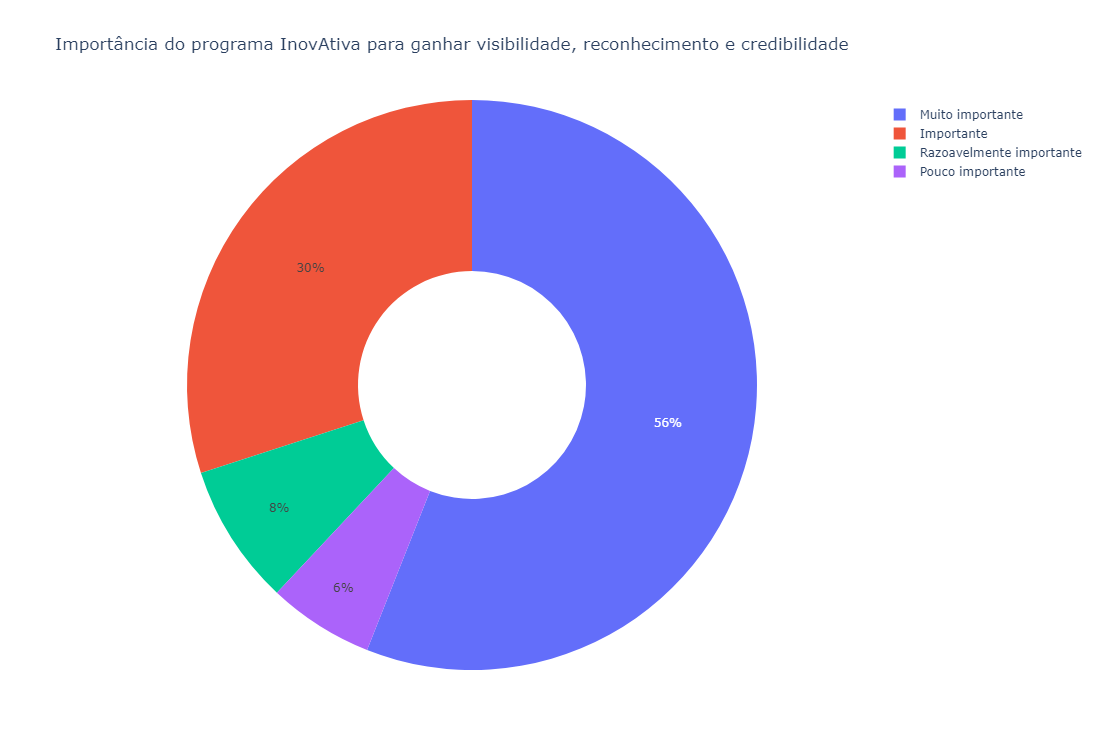

In [26]:
# Contagem das respostas na coluna "Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?"
visibilidade_count = df["Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?"].value_counts()

# Criar o gráfico de rosca
fig6 = go.Figure()

fig6.add_trace(go.Pie(labels=visibilidade_count.index, values=visibilidade_count.values, hole=0.4))

fig6.update_layout(title="Importância do programa InovAtiva para ganhar visibilidade, reconhecimento e credibilidade",
                   showlegend=True,                   
                   height=750, # height para configurar o tamanho do gráfico 
                   width=1100) # width para configurar o tamanho do gráfico 

# Salvar o gráfico como imagem
fig6.write_image("image\\grafico_rosca_visibilidade.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_rosca_visibilidade.png"))


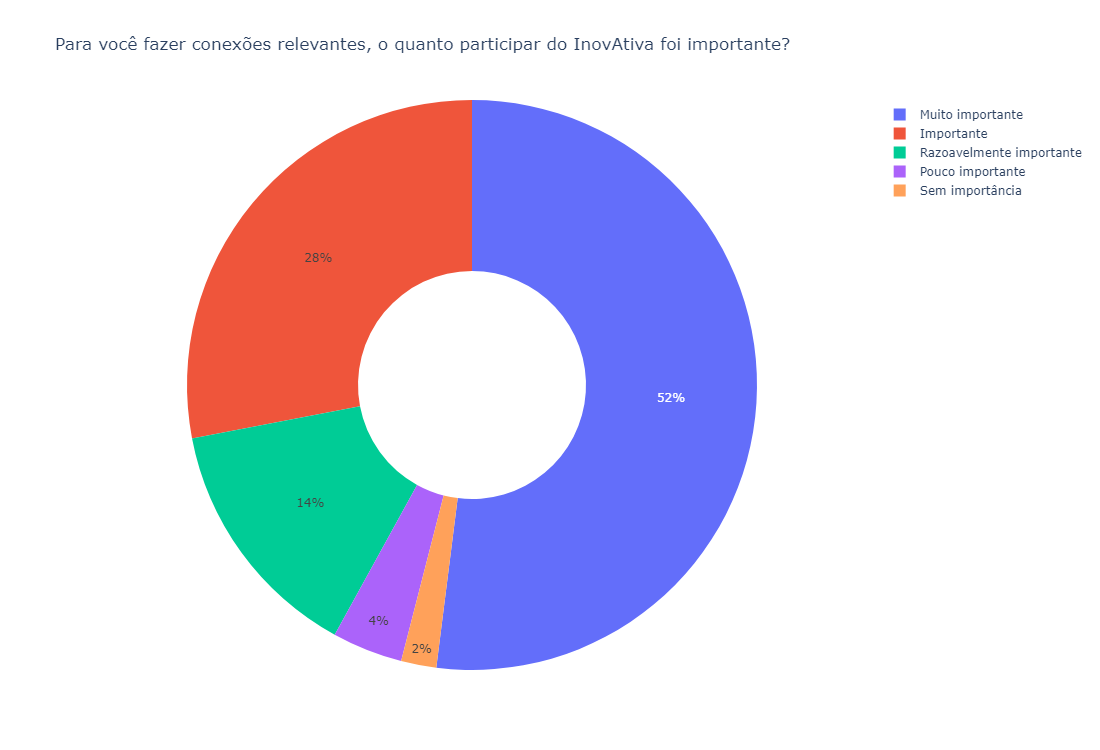

In [27]:
# Para você fazer conexões relevantes, o quanto participar do Inovativa foi importante?
visibilidade_count = df["Para você fazer conexões relevantes, o quanto participar do Inovativa foi importante?"].value_counts()

# Criar o gráfico de rosca
fig6 = go.Figure()

fig6.add_trace(go.Pie(labels=visibilidade_count.index, values=visibilidade_count.values, hole=0.4))

fig6.update_layout(title="Para você fazer conexões relevantes, o quanto participar do InovAtiva foi importante?",
                   showlegend=True,                   
                   height=750, # height para configurar o tamanho do gráfico 
                   width=1100) # width para configurar o tamanho do gráfico 

# Salvar o gráfico como imagem
fig6.write_image("image\\grafico_rosca_conexao.png")

# Exibir o gráfico no notebook
display(Image("image\\grafico_rosca_conexao.png"))

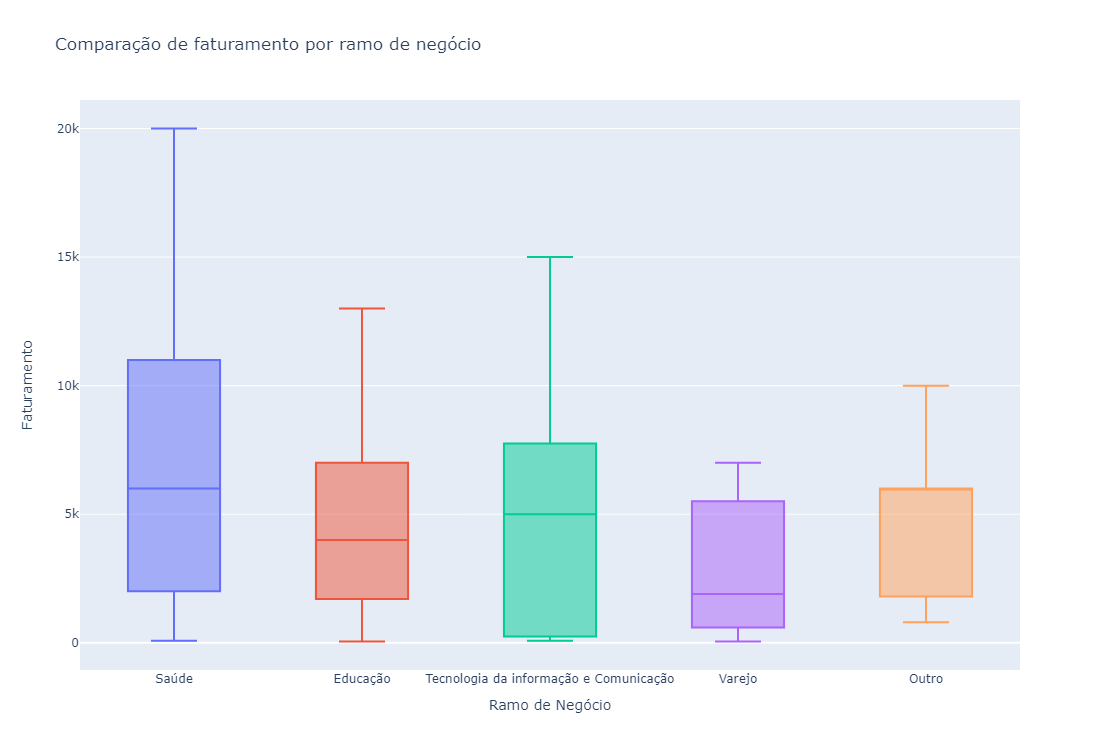

In [28]:
# Definir uma paleta de cores personalizada para os ramos de negócio
colors = px.colors.qualitative.Plotly

fig4 = px.box(df, x="Qual o ramo do seu negócio?", y="Faturamento após o programa",
              title="Comparação de faturamento por ramo de negócio",
              labels={"Faturamento após o programa": "Faturamento Após o Programa", "Qual o ramo do seu negócio?": "Ramo de Negócio"},
              color="Qual o ramo do seu negócio?", color_discrete_sequence=colors)

# Configuração de estilização
fig4.update_layout(yaxis_title="Faturamento", showlegend=False, height=750, width=1100)

# Salvando a imagem
fig4.write_image("image\\grafico_faturamento_por_ramo.png")
display(Image("image\\grafico_faturamento_por_ramo.png"))


**Comparação por Ramo de Negócio (Gráfico de Box-Plot):
Nesta análise, vamos agrupar as startups pelo ramo de negócio e comparar o faturamento após o programa em cada grupo usando um gráfico de box-plot.**

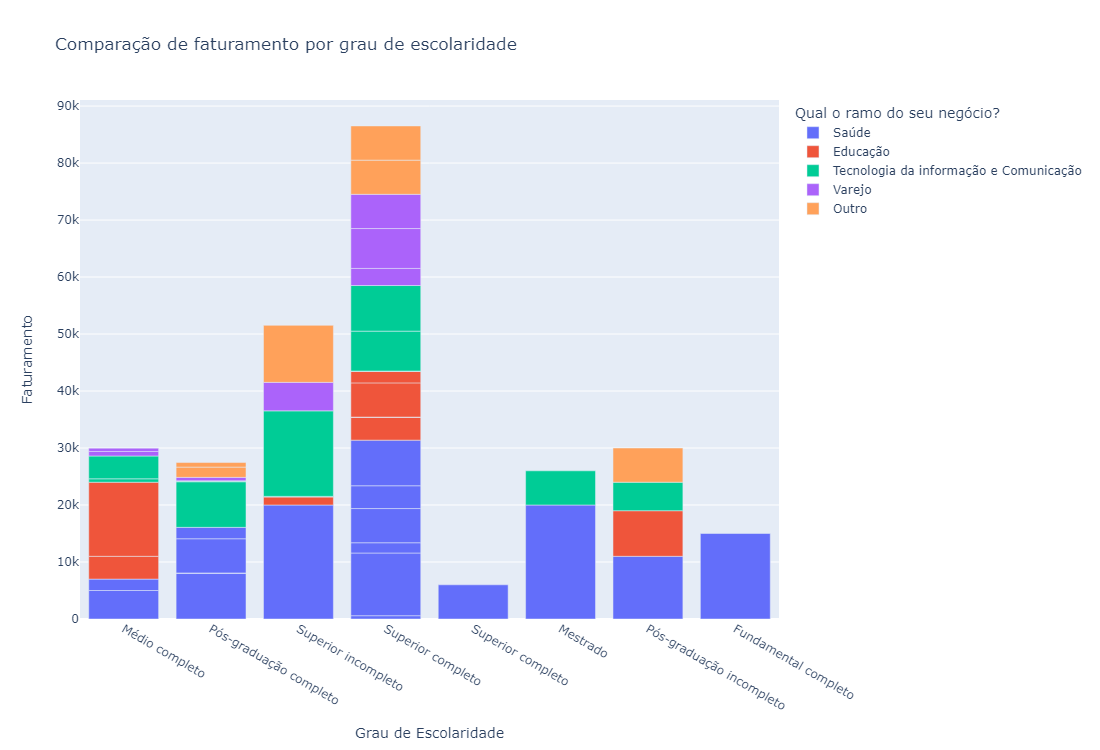

In [29]:
colors = px.colors.qualitative.Plotly

# plotagem de gráfico 
fig5 = px.bar(df, x="Grau de escolaridade", y="Faturamento após o programa",
              title="Comparação de faturamento por grau de escolaridade",
              labels={"Faturamento após o programa": "Faturamento Após o Programa", "Grau de escolaridade": "Grau de Escolaridade"},
              color="Qual o ramo do seu negócio?", color_discrete_sequence=colors)

# configuração da estilização
fig5.update_layout(yaxis_title="Faturamento", showlegend=True, width=1100, height=750)

# Salvar o gráfico como imagem
fig5.write_image("image\\grafico_faturamento_por_escolaridade.png")

# plotagem no nootbook
display(Image("image\\grafico_faturamento_por_escolaridade.png"))


**Comparação por Grau de Escolaridade (Gráfico de Box-Plot):
Nesta análise, vamos agrupar as startups pelo grau de escolaridade dos empreendedores e comparar o faturamento após o programa em cada grupo usando um gráfico de box-plot.**

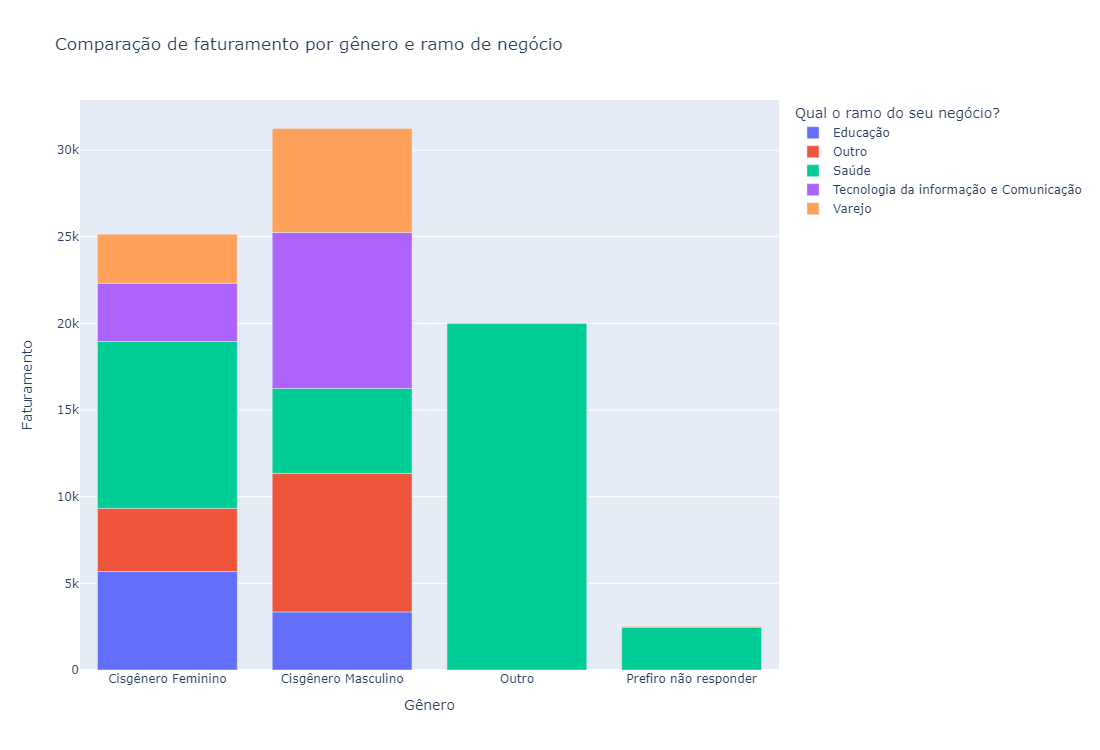

In [30]:

# Agrupar os dados por gênero e ramo de negócio, calculando a média do faturamento após o programa para cada combinação
df_grouped = df.groupby(["Qual seu gênero", "Qual o ramo do seu negócio?"], as_index=False)["Faturamento após o programa"].mean()

# Definir uma paleta de cores sequencial atrativa
colors =  px.colors.qualitative.Plotly

# Plotagem do gráfico de barras por gênero e ramo de negócio
fig6 = px.bar(df_grouped, x="Qual seu gênero", y="Faturamento após o programa", color="Qual o ramo do seu negócio?",
              title="Comparação de faturamento por gênero e ramo de negócio",
              labels={"Faturamento após o programa": "Faturamento Após o Programa", "Qual seu gênero": "Gênero"},
              color_discrete_sequence=colors)

# Estilização do gráfico
fig6.update_layout(yaxis_title="Faturamento", showlegend=True, width=1100, height=750)

# Salvar o gráfico como imagem
fig6.write_image("image\\grafico_faturamento_por_genero.png")

# Plotagem do gráfico no notebook
display(Image("image\\grafico_faturamento_por_genero.png"))



**Comparação por Gênero (Gráfico de Box-Plot):
Nesta análise, vamos agrupar as startups pelo gênero dos empreendedores e comparar o faturamento após o programa em cada grupo usando um gráfico de box-plot.**

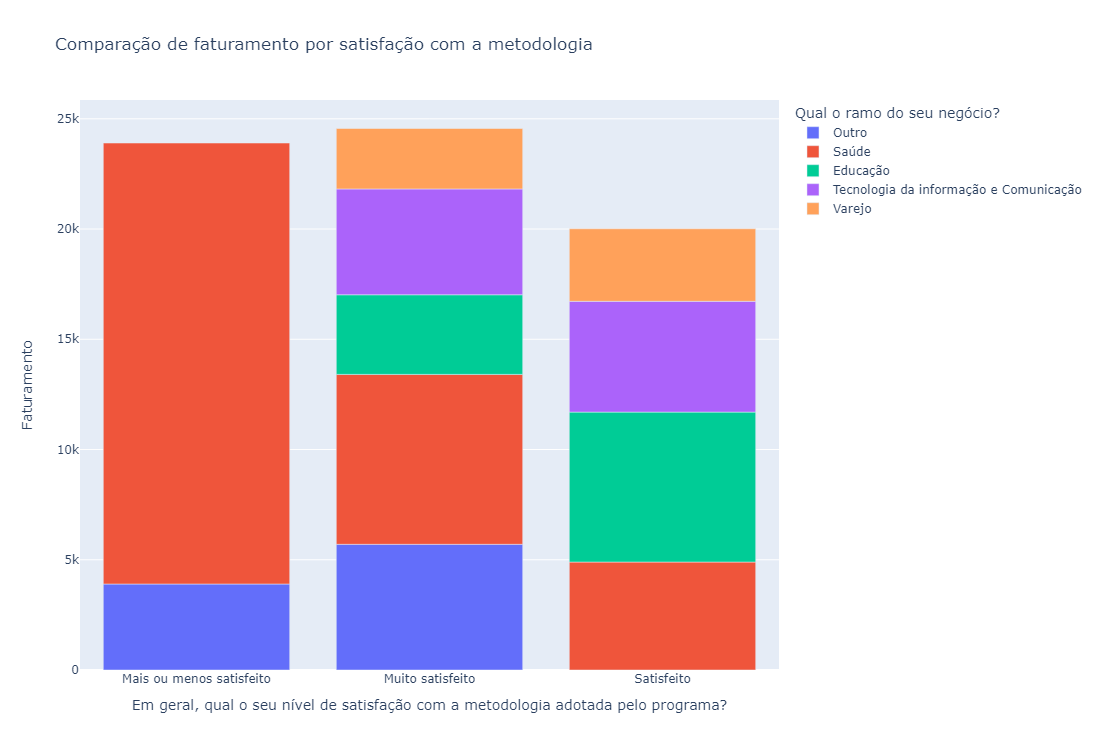

In [31]:

# Agrupar os dados por satisfação com a metodologia, calculando a média do faturamento após o programa para cada nível de satisfação
df_grouped = df.groupby(["Em geral, qual o seu nível de satisfação com a metodologia adotada pelo programa?", "Qual o ramo do seu negócio?"], as_index=False)["Faturamento após o programa"].mean()

# Definir uma paleta de cores sequencial atrativa
colors = px.colors.qualitative.Plotly

# Plotagem do gráfico de barras por satisfação com a metodologia e ramo de negócio
fig7 = px.bar(df_grouped, x="Em geral, qual o seu nível de satisfação com a metodologia adotada pelo programa?", y="Faturamento após o programa", color="Qual o ramo do seu negócio?",
              title="Comparação de faturamento por satisfação com a metodologia",
              labels={"Faturamento após o programa": "Faturamento Após o Programa", "Em geral, nível de satisfação": "Satisfação com a Metodologia"},
              color_discrete_sequence=colors)

# Estilização do gráfico
fig7.update_layout(yaxis_title="Faturamento", showlegend=True, width=1100, height=750)

# Salvar o gráfico como imagem
fig7.write_image("image\\grafico_faturamento_por_satisfacao.png")

# Plotagem do gráfico no notebook
display(Image("image\\grafico_faturamento_por_satisfacao.png"))


**Comparação por Satisfação com a Metodologia (Gráfico de Box-Plot):
Nesta análise, vamos agrupar as startups pela satisfação com a metodologia do programa e comparar o faturamento após o programa em cada grupo usando um gráfico de box-plot.**

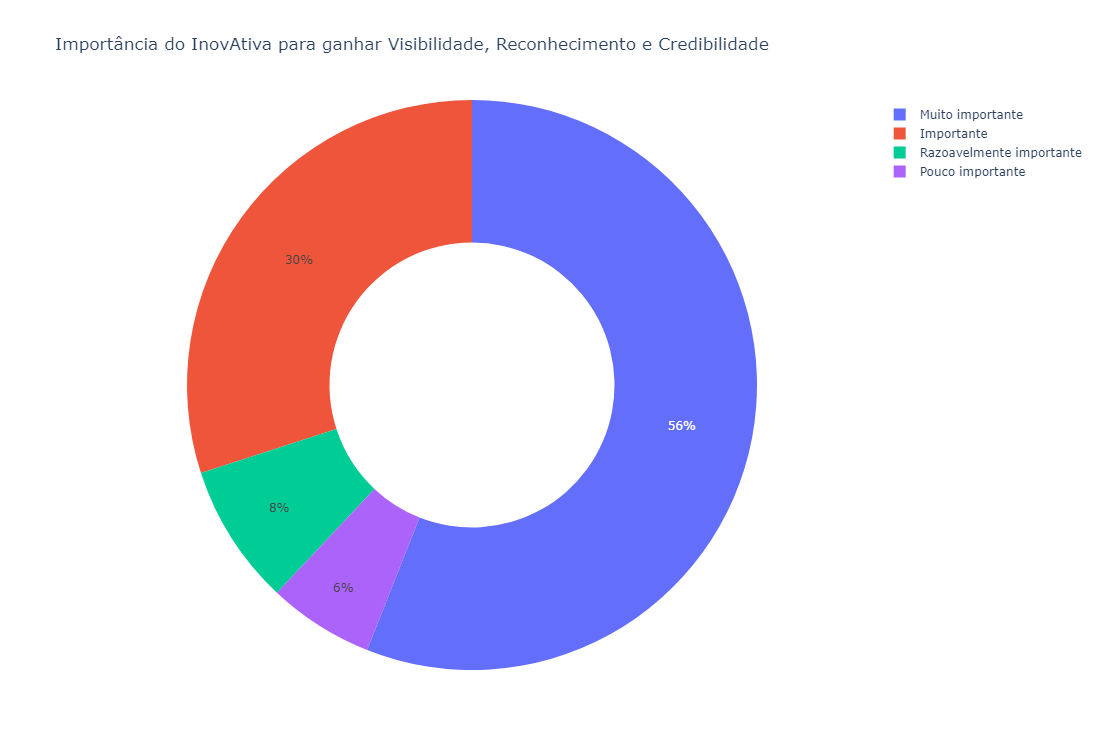

In [32]:
import plotly.graph_objects as go

labels = df["Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?"].unique()
values = df["Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?"].value_counts()

fig8 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig8.update_layout(title="Importância do InovAtiva para ganhar Visibilidade, Reconhecimento e Credibilidade",  width=1100, height=750)

# Salvar o gráfico como imagem
fig8.write_image("image\\grafico_importancia_inovativa.png")

display(Image("image\\grafico_importancia_inovativa.png"))